In [5]:
import pandas as pd
import numpy as np
import sys
import os

import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "simple_white"
from plotly.subplots import make_subplots

import fig_utils
import load_datasets

In [6]:
base_dir = os.path.join('sl_results','10Aug21','1','matbench_expt_gap')
f1 = os.path.join(base_dir,'matbench_expt_gap-1939-215-0-10.csv')
f2 = os.path.join(base_dir,'matbench_expt_gap-1939-215-90-100.csv')
paths = [f1, f2]

dp_traces = []
dy_traces = []
ndme_traces = []

for f in paths:
    if '90' in f:
        dp_traces.append(fig_utils.get_discovery_probability_traces([f], x_metric='NDME', legend=True))
        dy_traces.append(fig_utils.get_avg_and_std_trace(f, 'fraction_of_targets_found', legend=True))
    else:
        dp_traces.append(fig_utils.get_discovery_probability_traces([f], x_metric='NDME', legend=False))
        dy_traces.append(fig_utils.get_avg_and_std_trace(f, 'fraction_of_targets_found', legend=False))
        
    ndme_traces.append(fig_utils.get_avg_and_std_trace(f, 'NDME', legend=False))
    
    

File:  sl_results/10Aug21/1/matbench_expt_gap/matbench_expt_gap-1939-215-0-10.csv
File:  sl_results/10Aug21/1/matbench_expt_gap/matbench_expt_gap-1939-215-90-100.csv


This is the format of your plot grid:
[ (1,1) x,y   ]  ⎡ (1,2) x2,y2 ⎤
[ (2,1) x3,y3 ]  ⎣      :      ⎦
[ (3,1) x4,y4 ]  ⎡ (3,2) x5,y5 ⎤
[ (4,1) x6,y6 ]  ⎣      :      ⎦



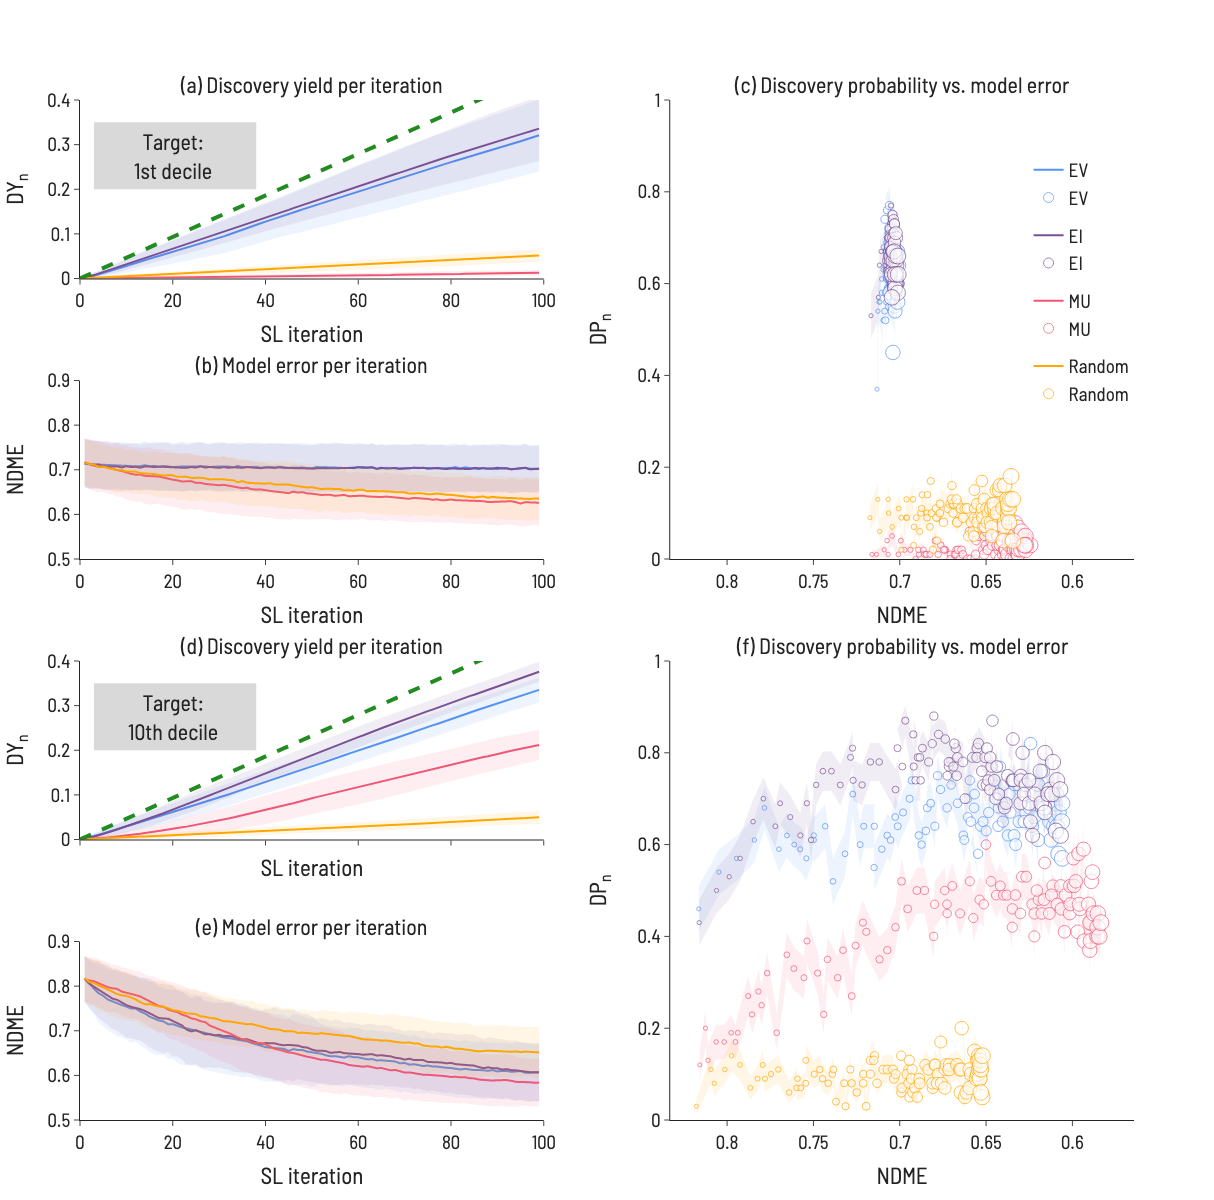

In [9]:
fig = make_subplots(
    rows=4, cols=2,
    specs=[[{}, {'rowspan':2}],
           [{}, None],
           [{}, {'rowspan':2}],
           [{}, None]],
    print_grid=True,
    shared_xaxes=True,
    vertical_spacing=0.1,
    horizontal_spacing=0.12,
    subplot_titles=['(a) Discovery yield per iteration', '(c) Discovery probability vs. model error', '(b) Model error per iteration',
                   '(d) Discovery yield per iteration', '(f) Discovery probability vs. model error', '(e) Model error per iteration']
)

row = 1
for i,j,k in zip(dp_traces, dy_traces, ndme_traces):
    
    for ft in i:
        fig.add_trace(ft, row=row, col=2)

    for it in j:
        fig.add_trace(it, row=row, col=1)

    for it in k:
        fig.add_trace(it, row=1+row, col=1)
    
    row += 2
    
# a perfect selection strategy would select a candidate at every iteration
## for Eg dataset n_targets = 215

benchmark_x_vals = np.linspace(0,215)
slope = 1/215
benchmark_y_vals = slope * benchmark_x_vals
benchmark_trace = go.Scatter(x=benchmark_x_vals, y=benchmark_y_vals, name='perfect SL strategy', 
                             line = dict(color='forestgreen', width=4, dash='dash'),
                            showlegend=False
)

fig.add_trace(benchmark_trace, row=1, col=1)
fig.add_trace(benchmark_trace, row=3, col=1)

fig.update_yaxes(title_text='DY<sub>n</sub>', range=[0, 0.4], row=1, col=1)
fig.update_yaxes(title_text='DY<sub>n</sub>', range=[0, 0.4], row=3, col=1)

fig.update_yaxes(title_text='NDME', range=[0.5, 0.9], row=2, col=1)
fig.update_yaxes(title_text='NDME', range=[0.5, 0.9], row=4, col=1)

fig.update_yaxes(title_text='DP<sub>n</sub>', range=[0,1], row=1, col=2)
fig.update_yaxes(title_text='DP<sub>n</sub>', range=[0,1], row=3, col=2)


fig.update_xaxes(title_text='NDME', autorange='reversed', row=1, col=2)
fig.update_xaxes(title_text='NDME', autorange='reversed', row=3, col=2)

fig.update_xaxes(title_text='SL iteration', range=[0,100], row=2, col=1)
fig.update_xaxes(title_text='SL iteration', range=[0,100], row=4, col=1)
fig.update_xaxes(title_text='SL iteration', range=[0,100], row=1, col=1)
fig.update_xaxes(title_text='SL iteration', range=[0,100], row=3, col=1)


fig.add_shape(type="rect", x0=3, x1=38, y0=0.2, y1=0.35, line_color="black", fillcolor="grey", row=1, col=1)
fig.add_shape(type="rect", x0=3, x1=38, y0=0.2, y1=0.35, line_color="black", fillcolor="grey", row=3, col=1)

fig.add_annotation(
  x=20,
  y=0.275, 
  ax=15,  
  ay=0.3,  
  xref='x',
  yref='y',
  axref='x',
  ayref='y',
    font=dict(size=18),
  showarrow=False,
    text='Target:<br>1st decile',
    row=1,
    col=1
)

fig.add_annotation(
  x=20,
  y=0.275, 
  ax=15,  
  ay=0.3,  
  xref='x',
  yref='y',
  axref='x',
  ayref='y',
    font=dict(size=18),
  showarrow=False,
    text='Target:<br>10th decile',
    row=3,
    col=1
)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.95,
    xanchor="left",
    x=0.9
))


fig.update_layout(xaxis_showticklabels=True, xaxis2_showticklabels=True, xaxis3_showticklabels=True)

fig.update_annotations(font=dict(family="Barlow Semi Condensed", size=22))
fig.update_layout(font=dict(family="Barlow Semi Condensed", size=19), width=1400, height=1200,  showlegend=True)
fig.write_image(os.path.join('static','fig4-SL_metrics-matbench_expt_gap.png'), scale=2)
fig.show()